# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [27]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [28]:
url= "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.1 Safari/537.36"}
response=requests.get(url,headers=headers)


if response.status_code==200:
    tabla=pd.read_html(response.text)[0]
else:
    print(f"ha ocurrido un error {response.status_code}")

 


/tmp/ipykernel_40241/4285692684.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabla=pd.read_html(response.text)[0]


Eliminamos los valores NaN (en este caso la ultima columna es la que tiene)

In [29]:
tabla.dropna(axis=1,inplace=True)

print(tabla)

                      Rank                   Song                 Artist(s)  \
0                        1      "Blinding Lights"                The Weeknd   
1                        2         "Shape of You"                Ed Sheeran   
2                        3              "Starboy"  The Weeknd and Daft Punk   
3                        4      "Sweater Weather"         The Neighbourhood   
4                        5    "Someone You Loved"             Lewis Capaldi   
..                     ...                    ...                       ...   
96                      97  "Sweet Child O' Mine"             Guns N' Roses   
97                      98                 "Sad!"              XXXTentacion   
98                      99           "Levitating"       Dua Lipa and DaBaby   
99                     100     "Someone Like You"                     Adele   
100  As of 18 October 2025  As of 18 October 2025     As of 18 October 2025   

        Streams (billions)           Release date  

Cambiamos el formato de las columnas "Release date", "Rank y de "Streams (billions)" y eliminamos la ultima fila de la tabla que no hace parte de los valores como tal

In [30]:
#Eliminamos la ultima fila
tabla=tabla.drop(100)
# Cambiamos formatos y tambien quitamos "."
tabla["Release date"]=pd.to_datetime(tabla['Release date'], format='%d %B %Y', errors='coerce')
tabla["Rank"]=pd.to_numeric(tabla["Rank"])
tabla["Streams (billions)"]=tabla["Streams (billions)"].str.replace('.','',regex=False).astype(int)
#Quitamos simbolos que no necesitemos
tabla["Song"]=tabla["Song"].str.replace(r'\[.*?\]','',regex=True)
tabla['Artist(s)']=tabla['Artist(s)'].str.replace(r'\[.*?\]','',regex=True)
tabla


,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,5081,2019-11-29
1,2,"""Shape of You""",Ed Sheeran,4598,2017-01-06
2,3,"""Starboy""",The Weeknd and Daft Punk,4149,2016-09-21
3,4,"""Sweater Weather""",The Neighbourhood,4098,2012-12-03
4,5,"""Someone You Loved""",Lewis Capaldi,4091,2018-11-08
...,...,...,...,...,...
95,96,"""Creep""",Radiohead,2450,1992-09-21
96,97,"""Sweet Child O' Mine""",Guns N' Roses,2444,1988-06-03
97,98,"""Sad!""",XXXTentacion,2443,2018-03-02
98,99,"""Levitating""",Dua Lipa and DaBaby,2434,2020-10-01


Almacenamos datos y creamos tabla en SQL

In [31]:
# Cramos base de datos
BaseDatos=sqlite3.connect("Canciones_mas_escuchadas.db")
# Creamos tabla
tabla.to_sql("Canciones_top",BaseDatos,if_exists="replace",index=False)


BaseDatos.commit()
BaseDatos.close()


Visualizacion

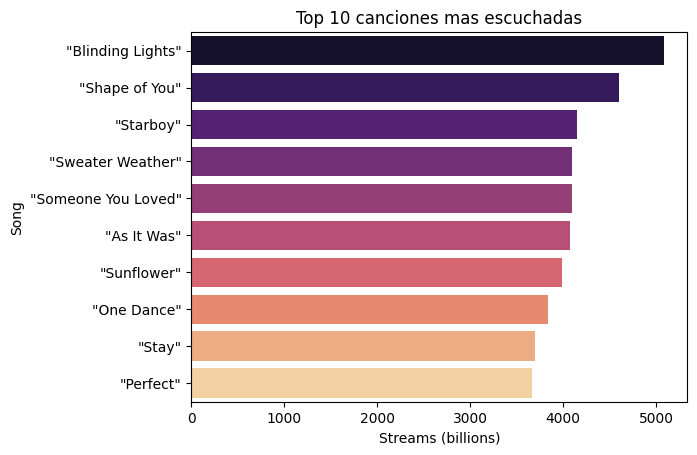

In [32]:
top10=tabla.nlargest(10,"Streams (billions)")
sns.barplot(data=top10,x="Streams (billions)",y="Song",hue="Song",palette="magma", legend=False)
plt.title("Top 10 canciones mas escuchadas")
plt.show()

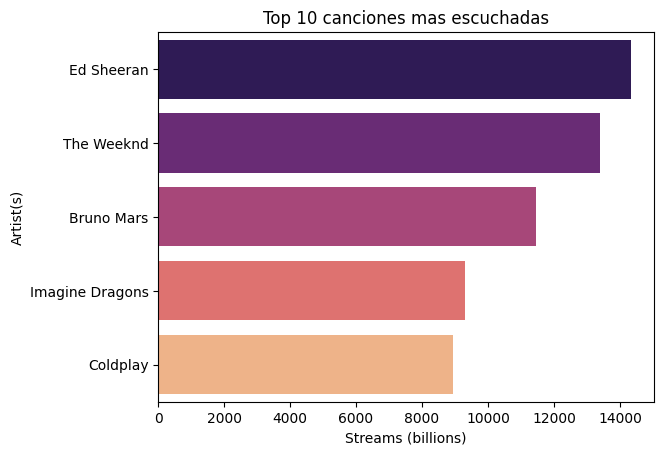

In [ ]:
artistas_mas_escuchados=tabla.groupby("Artist(s)",as_index=False)["Streams (billions)"].sum()
top5=artistas_mas_escuchados.nlargest(5,"Streams (billions)")
sns.barplot(data=top5,x="Streams (billions)",y="Artist(s)",hue="Artist(s)",palette="magma", legend=False)
plt.title("Top 5 Artistas mas escuchados")
plt.show()

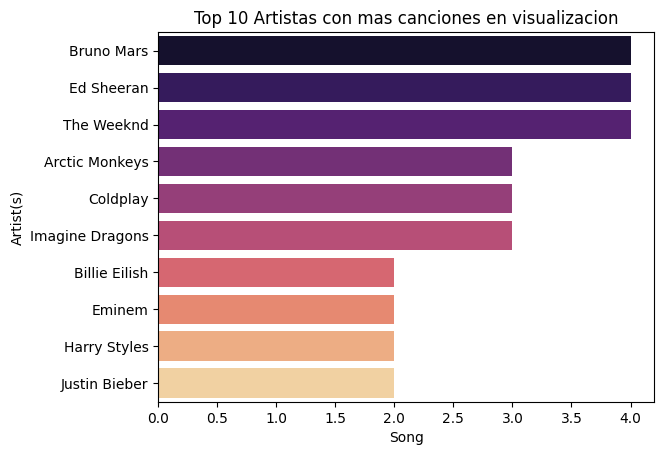

In [46]:
artistas_con_mas_canciones=tabla.groupby("Artist(s)",as_index=False)["Song"].count()
top3_artistas_con_mas_canciones=artistas_con_mas_canciones.nlargest(10,"Song")
sns.barplot(data=top3_artistas_con_mas_canciones,x="Song",y="Artist(s)",hue="Artist(s)",palette="magma", legend=False)
plt.title("Top 10 Artistas con mas canciones en visualizacion")
plt.show()